Chapter 21
# 将有向图转换为关联矩阵
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

In [2]:
G = nx.DiGraph()
# 创建有向图的实例

In [3]:
G.add_nodes_from(['a', 'b', 'c', 'd'])
# 添加多个顶点

In [4]:
G.add_edges_from([('b','a'),('c','b'),
                  ('b','d'),('d','c'),
                  ('a','c')])
# 增加一组有向边

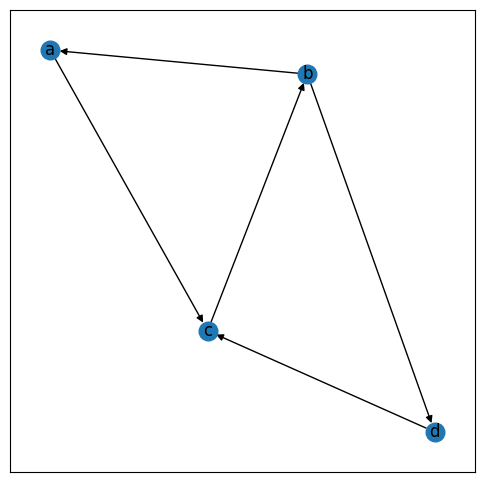

In [5]:
plt.figure(figsize = (6,6))
nx.draw_networkx(G, 
                 node_size = 180)

In [6]:
A = nx.adjacency_matrix(G).todense()

In [7]:
A

array([[0, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0]], dtype=int32)

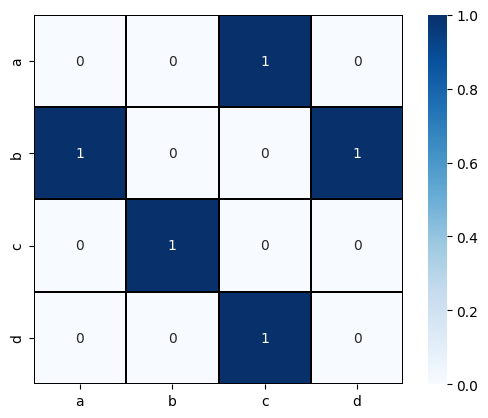

In [8]:
sns.heatmap(A, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            xticklabels = list(G.nodes), 
            yticklabels = list(G.nodes),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('邻接矩阵，有向图.svg')

In [9]:
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [10]:
G.edges()

OutEdgeView([('a', 'c'), ('b', 'a'), ('b', 'd'), ('c', 'b'), ('d', 'c')])

In [11]:
nx.incidence_matrix(G).todense()
# 不考虑方向，等同于与无向图

array([[1., 1., 0., 0., 0.],
       [0., 1., 1., 1., 0.],
       [1., 0., 0., 1., 1.],
       [0., 0., 1., 0., 1.]])

In [12]:
C = nx.incidence_matrix(G, oriented = True).todense()
# 关联矩阵，考虑方向

In [13]:
C

array([[-1.,  1.,  0.,  0.,  0.],
       [ 0., -1., -1.,  1.,  0.],
       [ 1.,  0.,  0., -1.,  1.],
       [ 0.,  0.,  1.,  0., -1.]])

In [21]:
np.abs(C).sum(axis = 1)

array([2., 3., 3., 2.])

In [16]:
dict(G.degree())

{'a': 2, 'b': 3, 'c': 3, 'd': 2}

In [23]:
# 有向图的入度
C.sum(axis = 1, where = (C == 1))

array([1., 1., 2., 1.])

In [17]:
G.in_degree()
# 有向图的入度

InDegreeView({'a': 1, 'b': 1, 'c': 2, 'd': 1})

In [24]:
# 有向图的出度
C.sum(axis = 1, where = (C == -1))

array([-1., -2., -1., -1.])

In [18]:
G.out_degree()
# 有向图的出度

OutDegreeView({'a': 1, 'b': 2, 'c': 1, 'd': 1})

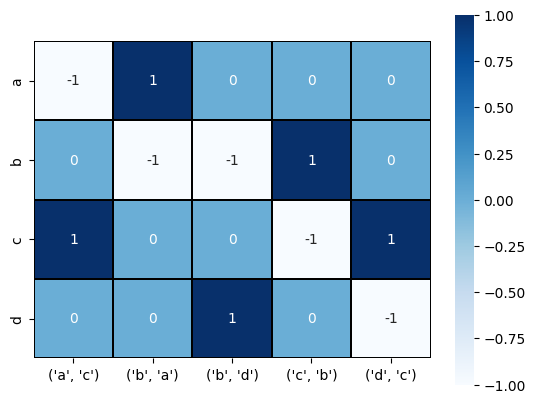

In [15]:
sns.heatmap(C, cmap = 'Blues', 
            annot = True, fmt = '.0f',
            yticklabels = list(G.nodes), 
            xticklabels = list(G.edges),
            linecolor = 'k', square = True,
            linewidths = 0.2)
plt.savefig('关联矩阵，有向图.svg')